/tmp/ipykernel_2444211/3101575937.py:50: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, counts, linestyle='solid', marker='None')


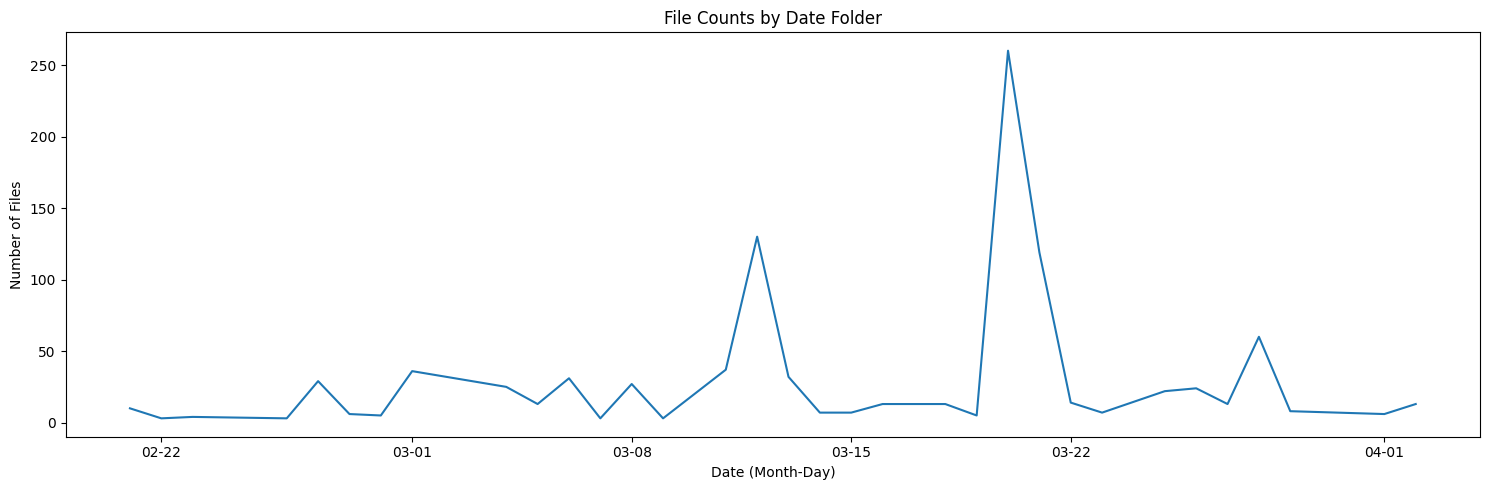

In [13]:
import os
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# 文件结构
# main_folder/
# ├── person1/
# │   ├── date1/
# │   │   ├── file1
# │   │   └── file2
# │   └── date2/
# │       ├── file1
# │       └── file2
# └── person2/
#     ├── date1/
#     │   ├── file1
#     │   └── file2
#     └── date2/
#         ├── file1
#         └── file2
# 设置你的主文件夹路径

main_folder_path = '../outputs/'

# 初始化一个字典来存储每个日期文件夹的文件数量
date_folder_counts = {}

# 遍历主文件夹下的所有子文件夹（即人名文件夹）
for person_folder in os.listdir(main_folder_path):
    person_folder_path = os.path.join(main_folder_path, person_folder)
    if os.path.isdir(person_folder_path):
        # 遍历每个人的文件夹下的所有日期文件夹
        for date_folder in os.listdir(person_folder_path):
            date_folder_path = os.path.join(person_folder_path, date_folder)
            if os.path.isdir(date_folder_path):
                # 计算每个日期文件夹下的文件数量
                file_count = len(os.listdir(date_folder_path))
                # 将结果存储在字典中，使用日期字符串作为键
                date_folder_counts[date_folder] = file_count

# 将日期字符串转换为datetime对象并排序
sorted_dates = sorted(date_folder_counts.keys(), key=lambda x: datetime.strptime(x, '%Y-%m-%d'))

# 提取日期和文件数量
dates = [datetime.strptime(date, '%Y-%m-%d') for date in sorted_dates]
counts = [date_folder_counts[date] for date in sorted_dates]

# 使用matplotlib生成时间序列图
plt.figure(figsize=(15, 5))
plt.plot_date(dates, counts, linestyle='solid', marker='None')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))  # 设置日期格式
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())  # 自动选择日期标签间隔
plt.xlabel('Date (Month-Day)')
plt.ylabel('Number of Files')
plt.title('File Counts by Date Folder')
plt.tight_layout()  # 自动调整布局以防止标签被裁剪
plt.show()